# 3 Clustering Problems

In clustering we are dealing with problems of unsupervised learning. Aka problems in which we do not know what we are going to determine.

## 3.1 K-Means
We have a set of data but we do not know whether there are clusters of data. K-means doe precisely that, finds clusters from raw unorganised data.

The algorithm works as follows

1- choose a number of clusters for the dataset

2- select k points at random $\rightarrow$ centroids (not necessarly in my dataset)

3- assign each data point to the closest centroid $\rightarrow$ formation of K-clusters

4- Update the position of the centroids

5- reassign each point to the closest centroid and go to 4 $\rightarrow$ if no new assignement $\rightarrow$ END.

Questions: How do we update the position of the centroids? HOw do we decide how many clusters are there in our dataset?

The update of the centroids is done by computing the center of mass of each cluster (assigning identical mass to each point in the cluster) an placin the centroid there.

In order to decide the number of clusters that go into our classification, we need to define a metric or use in order to understand what is the correct number of clusters. We use the WCSS defined as

$$
\text{WCSS} = \sum_{j} \Big( \sum_{p_i \in C_j} d(p_i, C_j)^2 \Big)
$$

where $C_j$ is the j-th centroid and $p_i$ is the i-th point. We want to decrease WCSS, but theoretically WCSS dminishes as we increase the number of clusters and if $C = p$ $\text{WCSS}\rightarrow 0$. We want to find some form of converegence that stops the number of clusters from increasing. We can plot the values of the WCSS as a function of the number of clusters and individuate the point of convergence $\rightarrow$ elbow method.



In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn; seaborn.set()

Text(0, 0.5, 'Spending score')

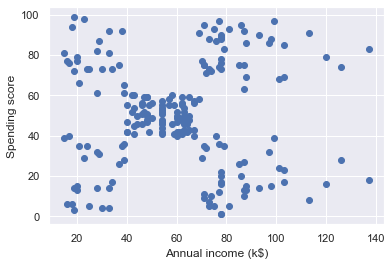

In [14]:
#================================================Import a dataset
dataset = pd.read_csv('Part 4 - Clustering/Section 24 - K-Means Clustering/Mall_Customers.csv') #name of the dataset
X = dataset.iloc[:,-2:].values 
# we want to understand and identify the behaviour of the set of customers according to the features reported into the dataset. We create a dependent variable and we assign that to the elements of the dataset according to the features. We are only interested in how annula income and spending score influence the pattern... we therefore cancel other feature

plt.scatter(X[:,0], X[:,1])
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score')
plt.title('Visualisation of data')


Text(0.5, 1.0, 'WCSS score')

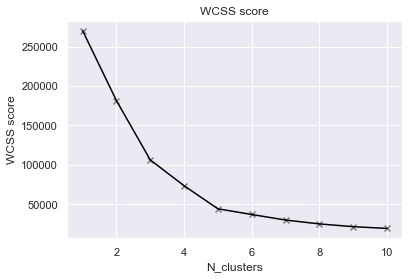

In [22]:
#================================================Elbow Method
from sklearn.cluster import KMeans

WCSS = []
for i in range(1,11):
    WCSS.append( KMeans(n_clusters=i, init='k-means++', random_state=42).fit(X).inertia_ )

plt.plot(np.arange(1,11), WCSS, c='black')
plt.scatter(np.arange(1,11), WCSS, c='grey', marker='x')
plt.xlabel('N_clusters')
plt.ylabel('WCSS score')
plt.title('WCSS score vs N_clusters')
